# 라이브러리 불러오기

In [9]:
# mecab 설치
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

SyntaxError: invalid syntax (<ipython-input-9-5291f3cfd313>, line 3)

In [19]:
import numpy as np
import pandas as pd
from konlpy.tag import Hannanum
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [20]:
data = pd.read_csv("review_link10.csv")

In [86]:
data

,상품명,리뷰,index
0,★에바 P!CK★라운드랩 자작나무 수분크림 1+1기획(+수분패드 10매),이브랜드는 올리브영 입점전부터 써본브랜드입니다 수분크림구매시에 성분이 중요한데요 어...,0
1,★에바 P!CK★라운드랩 자작나무 수분크림 1+1기획(+수분패드 10매),전에 어찌어찌하다 자작나무 수분크림 샘플을 받아 잘 쓰고 있는 중에 1+1행사한다니...,1
2,★에바 P!CK★라운드랩 자작나무 수분크림 1+1기획(+수분패드 10매),올리브영 대표 클린뷰티! 라운드랩! # 라운드랩 자작나무 수분 크림 ✔️ 제 피부...,2
3,★에바 P!CK★라운드랩 자작나무 수분크림 1+1기획(+수분패드 10매),💚수분감 진짜 내가 찾던 수분만 있는 제품.. 유분은 기름종이 보시면 알겠지만 1도...,3
4,★에바 P!CK★라운드랩 자작나무 수분크림 1+1기획(+수분패드 10매),원쁠원 행사 넘 좋아요 이번달 끝나기 전에 하나 더 사놓을까 고민이 되네요 .. ❄...,4
...,...,...,...
13990,더랩바이블랑두 올리고 히알루론산 5000토너 200ml 기획세트 (토너100ml 증정),이 스킨으로 스킨팩하면 확실히 피부가 촉촉해지고 맑아져요!,14273
13991,더랩바이블랑두 올리고 히알루론산 5000토너 200ml 기획세트 (토너100ml 증정),솔직히 받고 아직 안썼지만 맘에는 듭니다. 잘쓰겄소.,14274
13992,더랩바이블랑두 올리고 히알루론산 5000토너 200ml 기획세트 (토너100ml 증정),제가 써본 토너 중에는 가장 순하고 흡수가 잘되는것 같아요^^,14275
13993,더랩바이블랑두 올리고 히알루론산 5000토너 200ml 기획세트 (토너100ml 증정),트러블 피부인데 이거는 듬뿍 써도 아무것도 안나요!! 보습효과도 좋아서 3번째 재구...,14276


# 데이터 전처리

In [21]:
# 해당 문장 제거
string =  '※ 해당 리뷰는 원칙적으로 기본 상품이 동일한 단품 사용 후 작성된 것이며,개별 상품에 따라 용량 내지 일부 구성(1+1, 기획상품 등)이 상이할 수 있음을 안내드립니다.'

review_clean = []
for i in range(len(data)):
    temp = data['리뷰'].iloc[i]
    review_clean.append(temp.replace(string, ""))

In [22]:
data['리뷰'] = review_clean

In [23]:
data['리뷰'] = data['리뷰'].str.replace('\n',' ')
data['리뷰'] = data['리뷰'].str.replace('  ',' ')

In [24]:
target_string = ['피부타입', '복합성에 좋아요', '피부고민', '진정에 좋아요', '자극도', '자극없이 순해요']
data = data[~data['리뷰'].map(lambda x: all(string in x for string in target_string))]

In [25]:
data.iloc[4]['리뷰']

'원쁠원 행사 넘 좋아요 이번달 끝나기 전에 하나 더 사놓을까 고민이 되네요 .. ❄💙 여름용 수분크림 찾는 건성 김미연 다 이거 함 써봐 .. 넘 무겁지도 가볍지도 않은 시원한 사용감의 크림입니다!!! 젤크림이라 펴바르기도 좋아요!! 조금 놔두면 흡수 금방 되고 마무리도 산뜻하게 느껴져요. 가벼운 사용감에 비해 보습력은 짱짱헙니다! 젤크림이라 시원하기만 하고 보습은 전혀 안 된다? 무슨 말씀을 하시는 거죠?? 이 아이는 다릅니다!!! 속보습을 완전 잘 챙겨주는 느낌!!! 특히 여름에 하나쯤 갖고 있으면 정말 좋습니다!! 간절기에는 건성피부들에게 조금 미흡하겠지만 날 더운 여름날 피지로 고생하시는 분들 .. 흑흑 그분들에게 아주 찰떡이에요. 혹은 지성분들 .. 무거운 크림에 지친 사람들 이거 쓰고 광명찾아보소 ..  적당한 피지에 적당한 보습이 섞여서 유수분 밸런스를 맞춰준다는 느낌🌊 안에 수분 알갱이?가 들어있는데 처음에 얼굴 발랐을 때 크림 뭉친 거인줄 알았어요 \U0001f972 그게 아니라 수분캡슐이었음 .. 가볍게 바르면 알아서 잘 터집니다 꼼꼼하게 바르시면 좋아요. 제형이 가볍다보니까 얼굴에 두껍게 올라가기 쉬웠어요. 그래서 한 번 바르고 걷어내는 작업을 항상 하게되는 거 같아요. 남은 애들은 목으로 갑니다!! 목주름에도 수분 충전을 !! 자작나무 성분이 맞는 분들이 있고 안 맞는 분들이 있다하더라고요. 저는 상관없이 편하게 발랐습니다!'

In [26]:
from konlpy.tag import Okt
from tqdm import tqdm
import re
import pickle
import csv

def clean_text(text):
    text = text.replace(".", " ").strip()
    text = text.replace(".", " ").strip()
    pattern = '[^ ㄱ-ㅣ가-힣|0-9|a-zA-Z]+'
    text = re.sub(pattern=pattern, repl="", string=text)
    return text

def get_nouns(tokenizer, sentence):
    nouns = tokenizer.nouns(sentence)
    # nouns = [s for s, t in tagged if t in ['SL', 'NNG', 'NNP'] and len(s) > 1]
    return nouns

def tokenize(df):
    tokenizer = Hannanum()
    processed_data = []
    for sent in tqdm(df['리뷰']):
        sentence = clean_text(sent.replace('\n', "").strip())
        processed_data.append(get_nouns(tokenizer, sentence))
    return processed_data

def save_processed_data(processed_data):
    with open("/content/drive/MyDrive/데캡디/tokenized_data.csv", 'w', newline="", encoding='utf-8') as f:
        writer = csv.writer(f)
        for data in processed_data:
            writer.writerow(data)


In [27]:
processed_data = tokenize(data)
#save_processed_data(processed_data)

100%|███████████████████████████████████████████████████████████████████████████| 13995/13995 [01:47<00:00, 129.93it/s]


In [28]:
processed_data

[['이브랜드',
  '올리브영',
  '입점전부터',
  '써본브랜드입니다',
  '수분크림구매시',
  '성분',
  '중요한데요',
  '어떤수분크림',
  '향료',
  '발림성좋게하기위해',
  '여드름일으키',
  '쉐어버터',
  '등피',
  '피피',
  '요즘제품들',
  '소비자들',
  '워낙깐칸해서',
  '싸구려',
  '쓰레기들',
  '않넣고',
  '중소기업',
  '제품들',
  '성분',
  '브랜드',
  '광고',
  '성분보세오ㅡ',
  '수부',
  '속건조여드름피부추천입니다',
  '남성분',
  '쓰세요ㅡ추천',
  '자작나무수액',
  '몃프',
  '기재되어잇고',
  '전체성분',
  '피부',
  '성분',
  '여름',
  '수분크림필수',
  '가을',
  '피부건조잡티주름',
  '안생깁니다',
  '끈적임싫타',
  '안바르는분',
  '이거바르세오ㅡ',
  '가겹',
  '저',
  '우리피부',
  '보호',
  '수분성분',
  '가든합니다',
  '화정전쓰셔도ㅡ밀림없습니다',
  '악건성들',
  '이크림',
  '페이스오',
  '두방울',
  '쓰시면됩니다',
  '눈밑자글자글고민인분ㅡㅡㅡ꿀팁',
  '이크림한번밀어바르',
  '페이스오일한방울석어서',
  '또바르세오',
  '그리고한번더두둘겨바르세요',
  '머이렇',
  '하시겟죠',
  '주름안생기려',
  '관리하셔야합니ㅏ',
  '저는이제품바르',
  '미백크림또바릅니다',
  '아이크림또한번바릅니다',
  '수분이잇어야미백효과',
  '작용',
  '노화도멈춥니다',
  '저는50이고10년전부터',
  '올리브영신상',
  '다사',
  '성분만골라서',
  '주름',
  '안생김잡티ㅡ선크림집에서도바름',
  '기미없슴',
  '자이제답나왓죠',
  '수분크림',
  '제일중요',
  '추천'],
 ['전',
  '어찌어찌',
  '자작나무',
  '수분크림',
  '샘플',
  '중',
  '11행사한다',
  '수',
  '저

In [29]:
from gensim import corpora
dictionary = corpora.Dictionary(processed_data)
corpus = [dictionary.doc2bow(text) for text in processed_data]
print(corpus[1])

[(2, 1), (27, 1), (30, 6), (47, 1), (61, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 2), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 3), (91, 1), (92, 1), (93, 3), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 2), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1), (111, 1), (112, 1), (113, 1), (114, 1), (115, 1), (116, 1), (117, 1), (118, 1), (119, 1), (120, 2), (121, 1), (122, 1), (123, 4), (124, 1), (125, 1), (126, 1), (127, 1), (128, 4), (129, 1), (130, 1), (131, 1), (132, 2), (133, 1), (134, 1), (135, 1), (136, 1), (137, 1), (138, 1), (139, 1), (140, 1)]


In [30]:
print(dictionary[66])

제품들


In [31]:
len(dictionary)

32900

In [32]:
import gensim
NUM_TOPICS = 10 #10개의 토픽, k=10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.020*"선물용" + 0.008*"사용전" + 0.007*"사춘기" + 0.007*"상자"')
(1, '0.050*"구매" + 0.047*"사용" + 0.034*"대용량" + 0.026*"가격"')
(2, '0.041*"선물" + 0.014*"친구" + 0.013*"신랑" + 0.012*"토너팩하"')
(3, '0.017*"사용중" + 0.010*"적응" + 0.007*"쓰려구요" + 0.006*"어디"')
(4, '0.079*"라로슈포제" + 0.028*"에빠끌라" + 0.009*"딸" + 0.007*"여드름피부"')
(5, '0.038*"3번" + 0.036*"넘버즈" + 0.033*"진짜" + 0.023*"이거"')
(6, '0.149*"자극" + 0.045*"피부타입" + 0.040*"피부고민" + 0.038*"보습"')
(7, '0.039*"피부" + 0.039*"것" + 0.037*"사용" + 0.035*"토너"')
(8, '0.022*"폼클렌징" + 0.019*"좋아용" + 0.012*"좋아" + 0.009*"너무좋아요"')
(9, '0.021*"유튜버" + 0.011*"감사" + 0.008*"배송" + 0.008*"포장"')


In [33]:
print(ldamodel.print_topics())

[(0, '0.020*"선물용" + 0.008*"사용전" + 0.007*"사춘기" + 0.007*"상자" + 0.006*"개봉" + 0.004*"자극이" + 0.004*"불안" + 0.004*"삿는데" + 0.004*"하구요" + 0.003*"너무좋아서"'), (1, '0.050*"구매" + 0.047*"사용" + 0.034*"대용량" + 0.026*"가격" + 0.024*"제품" + 0.023*"용량" + 0.023*"것" + 0.016*"자극" + 0.016*"토너" + 0.014*"닦토"'), (2, '0.041*"선물" + 0.014*"친구" + 0.013*"신랑" + 0.012*"토너팩하" + 0.011*"미백" + 0.010*"이거쓰" + 0.008*"아들" + 0.005*"방식" + 0.005*"다써서" + 0.004*"처음써보는데"'), (3, '0.017*"사용중" + 0.010*"적응" + 0.007*"쓰려구요" + 0.006*"어디" + 0.006*"평범" + 0.005*"만족감" + 0.005*"무난템" + 0.005*"500" + 0.005*"굳" + 0.004*"2번정"'), (4, '0.079*"라로슈포제" + 0.028*"에빠끌라" + 0.009*"딸" + 0.007*"여드름피부" + 0.004*"똘러리앙" + 0.004*"좋네" + 0.004*"조금더" + 0.004*"봄여름" + 0.003*"알콜향" + 0.003*"퀄리티"'), (5, '0.038*"3번" + 0.036*"넘버즈" + 0.033*"진짜" + 0.023*"이거" + 0.018*"2번" + 0.013*"발효" + 0.012*"광" + 0.011*"발효성분" + 0.011*"크림" + 0.010*"넘버즈인"'), (6, '0.149*"자극" + 0.045*"피부타입" + 0.040*"피부고민" + 0.038*"보습" + 0.022*"복합성" + 0.019*"진정" + 0.016*"건성" + 0.015*"랩시리즈" + 0.013*"지성" + 0.012*"보통"'), 

In [34]:
# Perplexity 구하고 그래프 작성하기
perplexity_values = []
for i in range(2, 39):
     ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word = dictionary)
     perplexity_values.append(ldamodel.log_perplexity(corpus))


# ppl이 낮을수록 더 좋은 모델

In [35]:
perplexity_values

[-7.475057562033395,
 -7.587179875344108,
 -7.629892189588828,
 -7.674039187277541,
 -7.809891361957152,
 -7.95504358257958,
 -8.152871379493277,
 -8.393465162652348,
 -8.619040073064612,
 -8.87435290644792,
 -9.113466667506344,
 -9.316691093330872,
 -9.509180355335905,
 -9.662875590246356,
 -9.81313664940172,
 -9.976455695546955,
 -10.100386401750436,
 -10.245035708724865,
 -10.400268674223518,
 -10.556475502782694,
 -10.710683329046459,
 -10.839196862436479,
 -10.99200894696063,
 -11.12883627733547,
 -11.287863801722064,
 -11.438687128750722,
 -11.582022366044747,
 -11.732524116294057,
 -11.87717242711161,
 -12.031879636228071,
 -12.149662459420275,
 -12.324828356855628,
 -12.473964186662625,
 -12.630595420853027,
 -12.775626831924676,
 -12.91417850269172,
 -13.060052964310026]

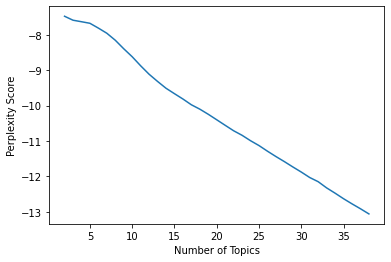

In [36]:
x = range(2,39)
plt.plot(x, perplexity_values)
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity Score")
plt.show()

# ppl 낮을수록 좋음

In [37]:
# Coherence score 구하고 그래프 작성하기
coherence_values = []
for i in range(2, 39):
     ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word = dictionary)
     coherence_model_lda = CoherenceModel(model = ldamodel,texts = processed_data ,dictionary = dictionary, topn = 10)
     coherence_lda = coherence_model_lda.get_coherence()
     coherence_values.append(coherence_lda)
     print("co:",coherence_lda)

NameError: name 'CoherenceModel' is not defined

In [ ]:
coherence_values

In [ ]:
x = range(2,39)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.show()

# coherence 높을수록 좋음

In [38]:
import gensim
NUM_TOPICS = 10 #10개의 토픽, k=10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.050*"구매" + 0.018*"제품" + 0.016*"대용량" + 0.015*"라로슈포제" + 0.013*"자극" + 0.011*"것" + 0.010*"저렴" + 0.010*"이번" + 0.010*"ㅎㅎ" + 0.009*"가격"')
(1, '0.014*"저렴해" + 0.011*"200ml" + 0.011*"유명해서" + 0.011*"폼" + 0.007*"아들" + 0.007*"믿고쓰" + 0.006*"안나서" + 0.006*"한번쯤" + 0.006*"더더" + 0.005*"품절"')
(2, '0.016*"ㅋ" + 0.013*"신랑" + 0.010*"매드몬스터" + 0.010*"제이호픽" + 0.009*"딸" + 0.006*"좋아욯ㅎ" + 0.006*"제이호" + 0.005*"차오르" + 0.005*"이가격" + 0.005*"아이들"')
(3, '0.018*"사용중" + 0.010*"동생" + 0.008*"순한거" + 0.007*"사춘기" + 0.006*"잘사용하" + 0.005*"가을겨울" + 0.004*"처음써보는데" + 0.004*"잘맞아요" + 0.004*"조아요" + 0.004*"어"')
(4, '0.049*"배송" + 0.018*"선물" + 0.011*"친구" + 0.011*"재구매했어요" + 0.010*"오늘드림" + 0.010*"포장" + 0.008*"라벨" + 0.008*"닥토하" + 0.007*"감사" + 0.005*"사용전"')
(5, '0.062*"토너" + 0.028*"3번" + 0.027*"넘버즈" + 0.015*"독" + 0.015*"피부결" + 0.015*"에센스" + 0.014*"독도토너" + 0.014*"2번" + 0.013*"각질제거" + 0.011*"닦토"')
(6, '0.043*"사용" + 0.040*"것" + 0.037*"피부" + 0.031*"토너" + 0.025*"저" + 0.023*"제품" + 0.015*"구매" + 0.015*"향" + 0.013*"때" + 0.011*"진정"')
(7, '0.182*"

In [39]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word = dictionary)

# lda dataframe형태로 출력
word_dict = {};

for i in range(NUM_TOPICS):
    words = ldamodel.show_topic(i, topn = 20)
    word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]

pd.DataFrame(word_dict)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,사용,피부,선물용,구매,토너,제품,좋구,세일해,자극,자극
1,피부,스킨,3번,사용,것,피부,예정,좋은거같아요,것,피부타입
2,스킨,제품,굿,것,피부,것,좋아용,뷰티,찰떡,보습
3,진정,토너,사용,제품,저,토너,사용전,차오르,무난무난,피부고민
4,향,사용,것,토너,사용,더랩,대신,쓸거같아요,무난,사용
5,라로슈포제,것,세일할,피부,제품,수,두통,클렌저,토너,진정
6,형,이거,남자들,대용량,향,사용,것,좋은걸,재구매했어요,복합성
7,닦토,수,피지조절,브링그린,때,흡수,조아요,여드름때문,쫀쫀하,피부
8,화장솜,저,각질관리,때,진짜,닥토용,독도토너,1등,사용,것
9,수,진정,한번쯤,수,구매,티트리,500,안맞는지,향,제품


In [40]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [43]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']

In [44]:
topictable

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,8.0,0.4736,"[(0, 0.043842923), (3, 0.27888128), (5, 0.1882..."
1,1,3.0,0.8811,"[(1, 0.029006373), (3, 0.88114744), (4, 0.0804..."
2,2,4.0,0.9296,"[(4, 0.92959154), (5, 0.02591176), (6, 0.03589..."
3,3,4.0,0.7200,"[(4, 0.71998715), (6, 0.24144368), (8, 0.02811..."
4,4,3.0,0.5124,"[(1, 0.040273793), (3, 0.5123916), (4, 0.37242..."
...,...,...,...,...
13990,13990,1.0,0.7750,"[(0, 0.025006533), (1, 0.77497536), (2, 0.0250..."
13991,13991,7.0,0.1000,"[(0, 0.099998094), (1, 0.09999834), (2, 0.1000..."
13992,13992,4.0,0.8500,"[(0, 0.016670758), (1, 0.01667039), (2, 0.0166..."
13993,13993,4.0,0.4474,"[(0, 0.012503922), (1, 0.29913872), (2, 0.0125..."


In [90]:
df2 = pd.DataFrame(index=range(0,13995), columns=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

In [91]:
a = 0 

for doc in topictable['각 토픽의 비중']:
    for i in range(len(doc)):
        # print(doc[i][0])
        # print(doc[i][1])
        df2.iloc[a, doc[i][0]] = doc[i][1]
    a += 1 

In [92]:
df2.fillna(0, inplace=True)

In [93]:
df2

,0,1,2,3,4,5,6,7,8,9,10
0,0.043843,0.000000,0.000000,0.278881,0.000000,0.188210,0.000000,0.000000,0.473593,0.000000,0
1,0.000000,0.029006,0.000000,0.881147,0.080437,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0.000000,0.000000,0.000000,0.000000,0.929592,0.025912,0.035894,0.000000,0.000000,0.000000,0
3,0.000000,0.000000,0.000000,0.000000,0.719987,0.000000,0.241444,0.000000,0.028114,0.000000,0
4,0.000000,0.040274,0.000000,0.512392,0.372420,0.000000,0.000000,0.000000,0.066084,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
13990,0.025007,0.774975,0.025002,0.025003,0.025004,0.025002,0.025001,0.025001,0.025001,0.025005,0
13991,0.099998,0.099998,0.100002,0.099998,0.099997,0.100000,0.100003,0.100003,0.100002,0.099999,0
13992,0.016671,0.016670,0.016668,0.016671,0.849980,0.016669,0.016667,0.016667,0.016668,0.016668,0
13993,0.012504,0.299139,0.012508,0.012505,0.447389,0.012505,0.012504,0.012503,0.165939,0.012505,0


In [96]:
import random 
numbers = []
for i in range(0,13995):
    number = random.randint(0, 1)
    numbers.append(number)
    
df2['10'] = numbers

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
 
x_train, x_test, y_train, y_test = train_test_split(df2[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']], df2['10'])
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
 
x2 = sm.add_constant(df2[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']])
model = sm.OLS(df2['10'], x2)
result = model.fit()
print(result.summary())
 
y_pred = log_reg.predict(x_test)
print(y_pred)
print(list(y_test))
 
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

                            OLS Regression Results                            
Dep. Variable:                     10   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.746
Date:                Tue, 11 Jan 2022   Prob (F-statistic):             0.0648
Time:                        21:06:45   Log-Likelihood:                -10149.
No. Observations:               13995   AIC:                         2.032e+04
Df Residuals:                   13984   BIC:                         2.040e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5583      0.192      2.904      0.0

In [100]:
tra

TypeError: fit() missing 1 required positional argument: 'y'